<a href="https://colab.research.google.com/github/agrawaltushant1995/The-Sparks-Foundations-task1/blob/main/TASK1_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science & Business Analytics Internship

# Tasks 1 - (Level - Beginner)

## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Author: Tushant Agrawal

# DATA FILE SOURCE :  http://bit.ly/w-data

In [ ]:
# Importing all libraries required in this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore") 
import seaborn as sns

In [ ]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")
df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# ***Exploratory Data Analysis***

In [ ]:
# checking the columns present
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [ ]:
# checking the Information of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
# checking the Shape Of the Dataset
df.shape

(25, 2)

In [ ]:
# checking the Datatype of each Attribute 
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [ ]:
# Checking the presence of Missing or null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
# Check the Statistical Details of Dataset
df.describe(include="all").transpose()

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


# Data Visualization

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

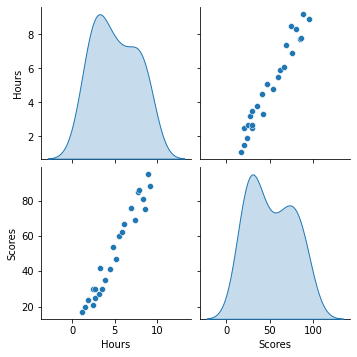

In [ ]:
# Plotting pairplot
sns.pairplot(df,diag_kind='kde') 

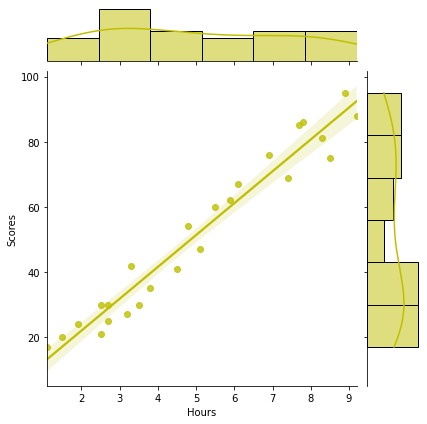

In [ ]:
#Plotting jointplot
sns.jointplot(df['Hours'], df['Scores'], kind="reg", color='y')

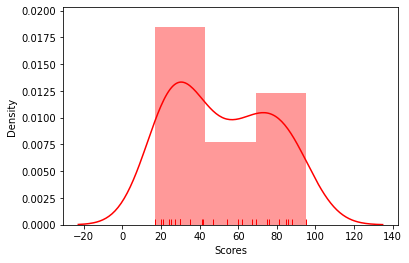

In [ ]:
#plotting distplot
sns.distplot(df['Scores'], kde=True, rug=True , color="Red")

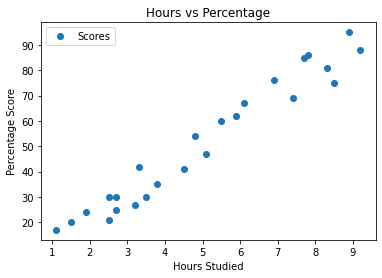

In [ ]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above shown in Data Visualization section, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is we have to divide the data into "attributes" (inputs) and "labels" (outputs).

In [ ]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

### ***Train-Test Spliting***
Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #train:test - 80:20

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


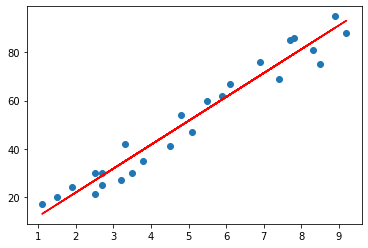

In [ ]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line, 'r');
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [ ]:
print(X_test) # Testing data - In Hours
pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Lastly the main objective of Predicting the score if a Student studies for 9.25 hrs/day through the model

In [ ]:
# You can also test with your own data
hours = 9.25
n_pred = regressor.predict([[hours]])
print("If a student studies for 9.25 hours/day,")
print("The Predicted score will = {}".format(n_pred[0]))

If a student studies for 9.25 hours/day,
The Predicted score will = 93.69173248737539


### **Evaluating the model**
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [ ]:
#Here from scikit learn we are evaluating by checking the errors present
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Mean Root Square Error:',np.sqrt (metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Mean Root Square Error: 4.647447612100373


# Conclusion :- If a student studies for 9.25 hrs/day, the predicted score will be 93.69